# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListing.csv")
WHRDataSet_filename = os.path.join(os.getcwd(),"data", "WHR2018Chapter2OnlineData.csv") 
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(WHRDataSet_filename, header=0)
df.head(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here

Predict the Life Ladder score (a measure of self-reported well-being) for a given country and year based on various socio-economic and political factors.

In other words:
"Guess how happy people are in a country in a given year, based on things like how much money they make, how healthy they are, and how free they feel.".

Dataset: The dataset used is WHRDataSet, which contains various socio-economic and political factors for different countries and years.
Prediction: We will be predicting the Life Ladder score, which is a measure of self-reported well-being.

Label: The label is the Life Ladder score, which is a continuous value.

Type of Problem: This is a supervised learning problem, as we have labeled data.This is a regression problem, as we are predicting a continuous value.It is not a classification problem, as we are not predicting a categorical label.

Features: Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality, GINI index (World Bank estimate).

Importance of the Problem:
Predicting Life Ladder scores can help organizations and governments understand the well-being of populations and identify areas for improvement. A model that accurately predicts Life Ladder scores can create value in these ways:
Policy-making: Governments can use the model to evaluate the effectiveness of policies and programs aimed at improving well-being.
Resource allocation: Organizations can allocate resources more effectively by identifying areas with low Life Ladder scores.
Economic development: Understanding the factors that contribute to well-being can inform economic development strategies.
Social impact: Companies can use the model to measure the social impact of their operations and economic investments.
By predicting Life Ladder scores, organizations can gain insights into the complex relationships between socio-economic and political factors and well-being leading to improvement in decision-making and value creation.>

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The columns in the DataFrame are: {', '.join(df.columns)}")
print("The first ten rows of the DataFrame:")
print(df.head(10))
print(df.shape)

The DataFrame has 1562 rows and 19 columns.
The columns in the DataFrame are: country, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality, Standard deviation of ladder by country-year, Standard deviation/Mean of ladder by country-year, GINI index (World Bank estimate), GINI index (World Bank estimate), average 2000-15, gini of household income reported in Gallup, by wp5-year
The first ten rows of the DataFrame:
       country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afgh

In [4]:
print("\nKey Statistics:")
print(df.describe(include='all'))


print("\nData Types:")
print(df.dtypes)


print("\nDataFrame Info:")
print(df.info())

print("Missing Values:")
print(df.isnull().sum())
print(df.shape)


Key Statistics:
         country         year  Life Ladder  Log GDP per capita  \
count       1562  1562.000000  1562.000000         1535.000000   
unique       164          NaN          NaN                 NaN   
top     Zimbabwe          NaN          NaN                 NaN   
freq          12          NaN          NaN                 NaN   
mean         NaN  2011.820743     5.433676            9.220822   
std          NaN     3.419787     1.121017            1.184035   
min          NaN  2005.000000     2.661718            6.377396   
25%          NaN  2009.000000     4.606351            8.310665   
50%          NaN  2012.000000     5.332600            9.398610   
75%          NaN  2015.000000     6.271025           10.190634   
max          NaN  2017.000000     8.018934           11.770276   

        Social support  Healthy life expectancy at birth  \
count      1549.000000                       1553.000000   
unique             NaN                               NaN   
top       

In [5]:
# Print key statistics
print("\nKey Statistics:")
print(df.describe(include='all'))

# Print data types
print("\nData Types:")
print(df.dtypes)

# Print DataFrame info
print("\nDataFrame Info:")
print(df.info())

# Print missing values
print("Missing Values:")
print(df.isnull().sum())

# Print DataFrame shape
print(df.shape)

# Replace NaN values with 0 for the entire dataset
df = df.fillna(0)

# Check for any duplicate rows and remove them
df = df.drop_duplicates()

# Reset the index (if necessary)
df = df.reset_index(drop=True)

# Print updated DataFrame shape
print("\nUpdated DataFrame Shape:")
print(df.shape)


Key Statistics:
         country         year  Life Ladder  Log GDP per capita  \
count       1562  1562.000000  1562.000000         1535.000000   
unique       164          NaN          NaN                 NaN   
top     Zimbabwe          NaN          NaN                 NaN   
freq          12          NaN          NaN                 NaN   
mean         NaN  2011.820743     5.433676            9.220822   
std          NaN     3.419787     1.121017            1.184035   
min          NaN  2005.000000     2.661718            6.377396   
25%          NaN  2009.000000     4.606351            8.310665   
50%          NaN  2012.000000     5.332600            9.398610   
75%          NaN  2015.000000     6.271025           10.190634   
max          NaN  2017.000000     8.018934           11.770276   

        Social support  Healthy life expectancy at birth  \
count      1549.000000                       1553.000000   
unique             NaN                               NaN   
top       

In [6]:
df = df.drop(['Standard deviation of ladder by country-year', 
              'Standard deviation/Mean of ladder by country-year', 
              'GINI index (World Bank estimate), average 2000-15'], axis=1)


In [7]:
print(df.head(10))
print(df.shape)

       country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   
5  Afghanistan  2013     3.572100            7.503376        0.483552   
6  Afghanistan  2014     3.130896            7.484583        0.525568   
7  Afghanistan  2015     3.982855            7.466215        0.528597   
8  Afghanistan  2016     4.220169            7.461401        0.559072   
9  Afghanistan  2017     2.661718            7.460144        0.490880   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.62443

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here


plan to implement the remaining phases of the machine learning life cycle:
New Feature List:
After inspecting the data, I will keep the following features:
1.Log GDP per capita
2.Social support
3.Healthy life expectancy at birth
4.Freedom to make life choices
5.Generosity
6.Perceptions of corruption
7.Positive affect
8.Negative affect
9.Confidence in national government
10.Democratic Quality
11.Delivery Quality

I removed the following features:
1.Standard deviation of ladder by country-year
2.Standard deviation/Mean of ladder by country-year
3.GINI index (World Bank estimate), average 2000-15

Data Preparation Techniques:
To prepare the data for modeling, I will use the following techniques:
Handling missing values: I will use the dropna() function to remove rows with missing values in the 'Life Ladder' column.
Feature scaling: I will use the StandardScaler() from Scikit-learn to scale the numerical features.
Data splitting: I will use the train_test_split() function to split the data into training, validation, and testing sets.

Model:My model is a Random Forest Regressor.
Model Building, Validation, and Selection Plan:
Train the model on the training set using the fit() method.
Evaluate the model's performance on the validation set using metrics such as MSE, MAE, and R-squared.
Analyze the model's performance and identify areas for improvement.
Tune hyperparameters using techniques such as GridSearchCV or RandomizedSearchCV.
Evaluate the improved model's performance on the validation set.
Select the best-performing model and evaluate its performance on the testing set.
Use techniques such as cross-validation to ensure the model generalizes well to new data.
By following this plan, I aim to create a model that accurately predicts Life Ladder scores and generalizes well to new data.>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

Top five features: Index(['Log GDP per capita', 'Healthy life expectancy at birth',
       'Positive affect', 'Social support', 'Democratic Quality'],
      dtype='object')
Feature importance:
Log GDP per capita: 0.369
Healthy life expectancy at birth: 0.308
Positive affect: 0.088
Social support: 0.086
Democratic Quality: 0.035


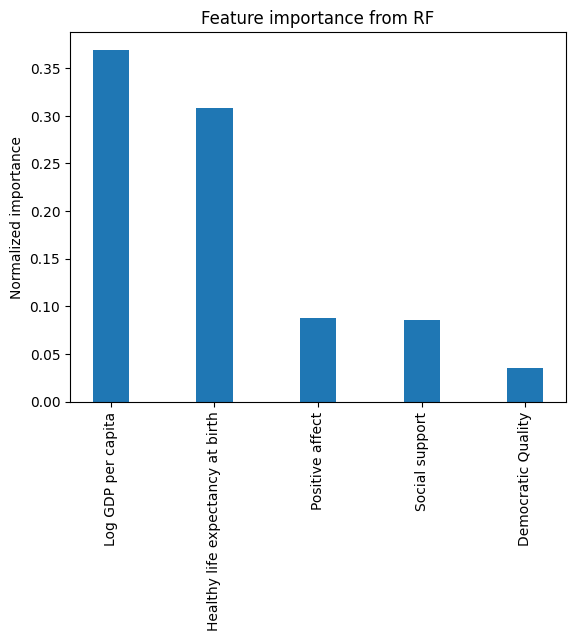

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: -0.18301002675862055
MSE: 0.15172679662992178
MAE: 0.28657519878429494
R-squared: 0.8843086259309816
MSE: 0.17837831635792056
MAE: 0.33971320761993734
R-squared: 0.8592569525797533


In [9]:
# YOUR CODE HERE
# Model: Random Forest Regressor with Feature Selection and Hyperparameter Tuning
# Objective: Predict 'Life Ladder' values using a subset of features from the dataset Approach:
#IMPUTE MISSING 'Life Ladder' values: Replace missing values with the mean of the 'Life Ladder' column
#Select top 5 features: Use feature importance from a Random Forest Regressor to select the top 5 features
#Scale numerical features: Standardize numerical features using StandardScaler
#Hyperparameter tuning: Perform grid search with cross-validation to find the best hyperparameters for the Random Forest Regressor
#Evaluate model: Evaluate the best-performing model on validation and testing sets using MSE, MAE, and R-squared metrics

# Define the feature names
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
            'Positive affect', 'Negative affect', 'Confidence in national government', 
            'Democratic Quality', 'Delivery Quality']

# Remove unwanted features
df = df[features + ['Life Ladder']]

# Impute missing values in 'Life Ladder' column
df['Life Ladder'].fillna(df['Life Ladder'].mean(), inplace=True)

# Split data into training, validation, and testing sets
X = df.drop('Life Ladder', axis=1)
y = df['Life Ladder']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']] = scaler.fit_transform(X_train[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
X_val[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']] = scaler.transform(X_val[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
X_test[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']] = scaler.transform(X_test[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])

# Perform feature selection using feature importance
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
feature_indices = np.argsort(feature_importances)[::-1][:5]
X_train_selected = X_train.iloc[:, feature_indices]
X_val_selected = X_val.iloc[:, feature_indices]
X_test_selected = X_test.iloc[:, feature_indices]

# Get the top 5 feature names
top_five = X_train.columns[feature_indices]
print('Top five features: {0}'.format(top_five))

# Print the feature importance
print("Feature importance:")
for feature, importance in zip(top_five, sorted(model.feature_importances_, reverse=True)[:5]):
    print(f"{feature}: {importance:.3f}")

# Create a bar plot of the normalized feature importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(np.arange(5), sorted(model.feature_importances_, reverse=True)[:5], width = 0.35)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(top_five, rotation = 90)
plt.title('Feature importance from RF')
ax.set_ylabel('Normalized importance')
plt.show()

# Define model
rf_model = RandomForestRegressor()

# Define hyperparameter tuning space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Perform grid search with cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate improved model on validation set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_val_selected)
print('MSE:', mean_squared_error(y_val, y_pred))
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R-squared:', r2_score(y_val, y_pred))

# Evaluate best-performing model on testing set
y_pred = best_rf_model.predict(X_test_selected)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best MAE: 0.18301002675862055


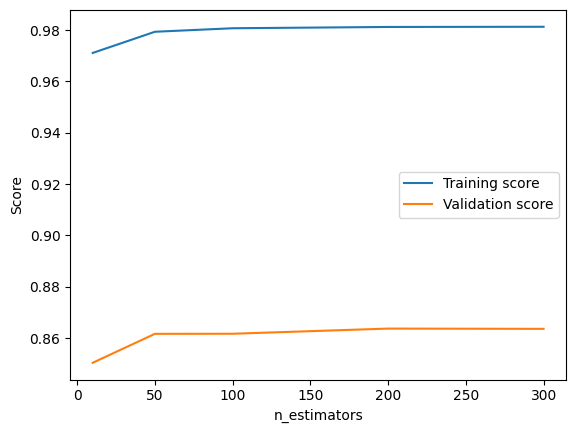

In [10]:
# Print best hyperparameters and their values
print('Best hyperparameters:', grid_search.best_params_)
print('Best MAE:', -grid_search.best_score_)

# Plot validation curves for the best hyperparameters
param_name = 'n_estimators'  # or any other hyperparameter
param_range = [10, 50, 100, 200, 300]
train_scores, test_scores = validation_curve(grid_search.best_estimator_, X_train, y_train, param_name=param_name, param_range=param_range, cv=5)

plt.plot(param_range, train_scores.mean(axis=1), label='Training score')
plt.plot(param_range, test_scores.mean(axis=1), label='Validation score')
plt.xlabel(param_name)
plt.ylabel('Score')
plt.legend()
plt.show()

Top five features: Index(['Log GDP per capita', 'Healthy life expectancy at birth',
       'Positive affect', 'Social support', 'Democratic Quality'],
      dtype='object')
Feature importance:
Log GDP per capita: 0.350
Healthy life expectancy at birth: 0.342
Positive affect: 0.084
Social support: 0.070
Democratic Quality: 0.036


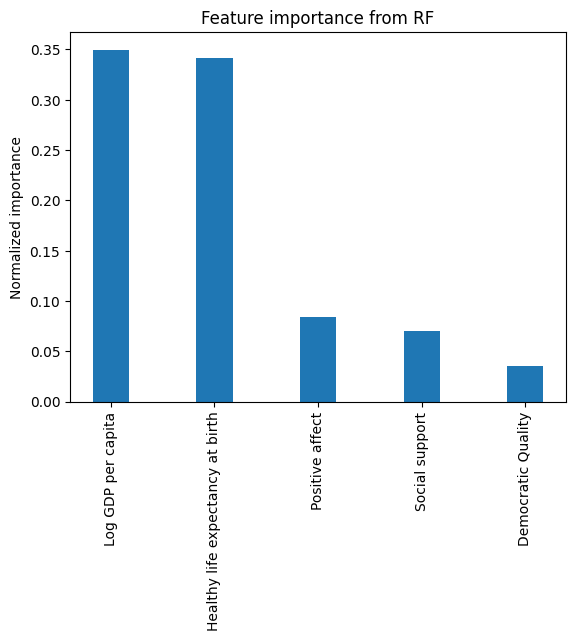

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: -0.18352650816180716
MSE: 0.14982068697435375
MAE: 0.2869586658056201
R-squared: 0.8857620306694785
MSE: 0.1767720549732512
MAE: 0.3393502272650546
R-squared: 0.8605243158268545


In [11]:
 #Model: Random Forest Regressor with Feature Selection and Hyperparameter Tuning (Drop 'Life Ladder')
#Objective: Predict 'Life Ladder' values using a subset of features from the dataset, without imputing missing values Approach:
# DROP ROWS WITH MISSING 'Life Ladder' values: Remove rows with missing 'Life Ladder' values from the dataset
#Select top 5 features: Use feature importance from a Random Forest Regressor to select the top 5 features
#Scale numerical features: Standardize numerical features using StandardScaler
#Hyperparameter tuning: Perform grid search with cross-validation to find the best hyperparameters for the Random Forest Regressor
#Evaluate model: Evaluate the best-performing model on validation and testing sets using MSE, MAE, and R-squared metrics

# Define the feature names
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
            'Positive affect', 'Negative affect', 'Confidence in national government', 
            'Democratic Quality', 'Delivery Quality']

# Remove unwanted features
df = df[features + ['Life Ladder']]

# Handle missing values
df.dropna(subset=['Life Ladder'], inplace=True)

# Split data into training, validation, and testing sets
X = df.drop('Life Ladder', axis=1)
y = df['Life Ladder']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']] = scaler.fit_transform(X_train[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
X_val[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']] = scaler.transform(X_val[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])
X_test[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']] = scaler.transform(X_test[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']])

# Perform feature selection using feature importance
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
feature_indices = np.argsort(feature_importances)[::-1][:5]
X_train_selected = X_train.iloc[:, feature_indices]
X_val_selected = X_val.iloc[:, feature_indices]
X_test_selected = X_test.iloc[:, feature_indices]

# Get the top 5 feature names
top_five = X_train.columns[feature_indices]
print('Top five features: {0}'.format(top_five))

# Print the feature importance
print("Feature importance:")
for feature, importance in zip(top_five, sorted(model.feature_importances_, reverse=True)[:5]):
    print(f"{feature}: {importance:.3f}")

# Create a bar plot of the normalized feature importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(np.arange(5), sorted(model.feature_importances_, reverse=True)[:5], width = 0.35)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(top_five, rotation = 90)
plt.title('Feature importance from RF')
ax.set_ylabel('Normalized importance')
plt.show()

# Define model
rf_model = RandomForestRegressor()

# Define hyperparameter tuning space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Perform grid search with cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate improved model on validation set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_val_selected)
print('MSE:', mean_squared_error(y_val, y_pred))
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R-squared:', r2_score(y_val, y_pred))

# Evaluate best-performing model on testing set
y_pred = best_rf_model.predict(X_test_selected)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))



Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best MAE: 0.18352650816180716


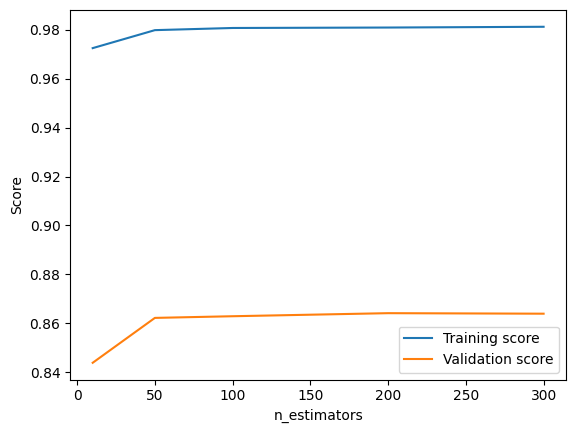

In [12]:
# Print best hyperparameters and their values
print('Best hyperparameters:', grid_search.best_params_)
print('Best MAE:', -grid_search.best_score_)

# Plot validation curves for the best hyperparameters
param_name = 'n_estimators'  # or any other hyperparameter
param_range = [10, 50, 100, 200, 300]
train_scores, test_scores = validation_curve(grid_search.best_estimator_, X_train, y_train, param_name=param_name, param_range=param_range, cv=5)

plt.plot(param_range, train_scores.mean(axis=1), label='Training score')
plt.plot(param_range, test_scores.mean(axis=1), label='Validation score')
plt.xlabel(param_name)
plt.ylabel('Score')
plt.legend()
plt.show()